# List of Problems 

<!-- {#list-of-problems .unnumbered} -->

- [Problem midpoint](#problem_midpoint)

- [Problem tableau](#problem_tableau)

- [Problem Runge Kutta4](#problem_rk4)

- [Problem embedded](#problem_embedded)

- [Problem coding A](#prob_a)

- [Problem coding B](#prob_b)

- [Problem coding C](#prob_c)




# Objectives
In this lab, you will explore Runge-Kutta methods for solving ordinary
differential equations. The goal is to gain a better understanding of
some of the more popular Runge-Kutta methods and the corresponding
numerical code.

Specifically you will be able to:

-   describe the mid-point method

-   construct a Runge-Kutta tableau from equations or equations from a
    tableau

-   describe how a Runge-Kutta method estimates truncation error

-   edit a working Octave code to use a different method or solve a
    different problem

# Readings


There is no required reading for this lab, beyond the contents of the
lab itself. However, if you would like additional background on any of
the following topics, then refer to the sections indicated below.

**Runge-Kutta Methods:**

    -   Newman, Chapter 8

    -   Press, et al.  Section 16.1

    -   Burden & Faires  Section 5.4
    

# Solving Ordinary Differential Equations with the Runge-Kutta Methods 

Ordinary differential equations (ODEs) arise in many physical
situations. For example, there is the first-order Newton cooling
equation discussed in , and perhaps the most famous equation of all, the
second-order Newton’s Second Law of Mechanics $F=ma$ .

In general, higher-order equations, such as Newton’s force equation, can
be rewritten as a system of first-order equations . So the generic
problem in ODEs is a set of N coupled first-order differential equations
of the form, 

$$
  \frac{d{\bf y}}{dt} = f({\bf y},t)
$$ 
  
where ${\bf y}$ is a vector of
variables.

For a complete specification of the solution, boundary conditions for
the problem must be given. Typically, the problems are broken up into
two classes:

-   **Initial Value Problem (IVP)**: the initial values of
    ${\bf y}$ are specified.

-   **Boundary Value Problem (BVP)**: ${\bf y}$ is
    specified at the initial and final times.

For this lab, we are concerned with the IVP’s. BVP’s tend to be much
more difficult to solve and involve techniques which will not be dealt
with in this set of labs.

Now as was pointed out in , in general, it will not be possible to find
exact, analytic solutions to the ODE. However, it is possible to find an
approximate solution with a finite difference scheme such as the forward
Euler method . This is a simple first-order, one-step scheme which is
easy to implement. However, this method is rarely used in practice as it
is neither very stable nor accurate.

The higher-order Taylor methods discussed in are one alternative but
involve higher-order derivatives that must be calculated by hand or
worked out numerically in a multi-step scheme. Like the forward Euler
method, stability is a concern.

The Runge-Kutta methods are higher-order, one-step schemes that makes
use of information at different <span>*stages*</span> between the
beginning and end of a step. They are more stable and accurate than the
forward Euler method and are still relatively simple compared to schemes
such as the multi-step predictor-corrector methods or the Bulirsch-Stoer
method. Though they lack the accuracy and efficiency of these more
sophisticated schemes, they are still powerful methods that almost
always succeed for non-stiff IVPs.

# The Midpoint Method: A Two-Stage Runge-Kutta Method 

The forward Euler method takes the solution at time $t_n$ and advances
it to time $t_{n+1}$ using the value of the derivative $f(y_n,t_n)$ at
time $t_n$ 

$$y_{n+1} = y_n + h f(y_n,t_n)$$ 

where $h \equiv \Delta t$.

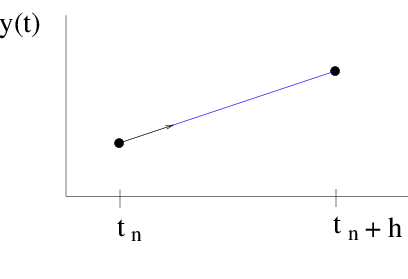

In [41]:
from IPython.display import Image
Image(filename="images/euler.png")

Figure euler: The forward Euler method is essentially a straight-line approximation
to the solution, over the interval of one step, using the derivative at
the starting point as the slope. 

The idea of the Runge-Kutta schemes is to take advantage of derivative
information at the times between $t_n$ and $t_{n+1}$ to increase the
order of accuracy.

For example, in the midpoint method, the derivative at the initial time
is used to approximate the derivative at the midpoint of the interval,
$f(y_n+\frac{1}{2}hf(y_n,t_n), t_n+\frac{1}{2}h)$. The derivative at the
midpoint is then used to advance the solution to the next step. The
method can be written in two *stages* $k_i$,

<a name="eq_midpoint"></a>
$$
\begin{aligned}
   \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{1}{2}k_1, t_n+\frac{1}{2}h)\ \ \rm{eq: midpoint}\\
    y_{n+1} = y_n + k_2
  \end{array}
\end{aligned}
$$ 

The midpoint method is known
as a 2-stage Runge-Kutta formula.



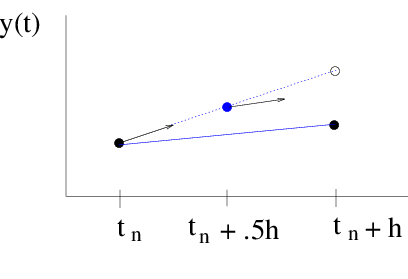

In [42]:
Image(filename='images/midpoint.png')

Figure midpoint: The midpoint method again uses the derivative at the starting point to
approximate the solution at the midpoint. The derivative at the midpoint
is then used as the slope of the straight-line approximation.

# Second-Order Runge-Kutta Methods

As was shown in lab 2 , the error in the forward Euler method is
proportional to $h$. In other words, the forward Euler method has an
accuracy which is *first order* in $h$.

The advantage of the midpoint method is that the extra derivative
information at the midpoint results in the first order error term
cancelling out, making the method *second order* accurate.
This can be shown by a Taylor expansion of equation
[eq: midpoint](#eq_midpoint)

<a name='problem_midpoint'></a>
**Problem midpoint**: Even though the midpoint method is second-order
accurate, it may still be less accurate than the forward Euler method.
In the demo below, compare the accuracy of the two methods on the
initial value problem 

$$
  \frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \textbf{eq: linexp}
$$ 

which has the exact
solution 
$$
  y(t) = t + e^{-t}
$$

1.  Why is it possible that the midpoint method may be less accurate
    than the forward Euler method, even though it is a higher order
    method?

2.  Based on the numerical solutions of (eq: linexp), which method
    appears more accurate?

3.  Cut the stepsize in half and check the error at a given time. Repeat
    a couple of more times. How does the error drop relative to the
    change in stepsize?

4.  How do the numerical solutions compare to $y(t) = t + e^{-t}$ when
    you change the initial time? Why?

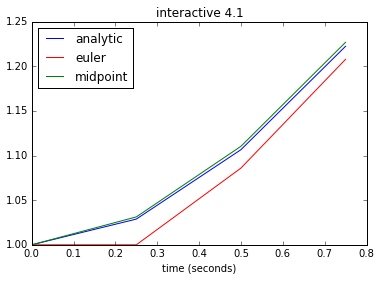

In [43]:
%matplotlib inline
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41
import numpy as np
from matplotlib import pyplot as plt

initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.25,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
theAx.legend(loc='best')
theAx.set_title('interactive 4.1')

In general, an *explicit* 2-stage Runge-Kutta method can be
written as, 

$$
\begin{aligned}
   \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+b_{21}k_1, t_n+a_2h)\ \ \ \textbf{eq: explicitrk2}  \\
    y_{n+1} = y_n + c_1k_1 +c_2k_2
  \end{array}
\end{aligned}
$$
   
   The scheme is said to be
<span>*explicit*</span> since a given stage does not depend
<span>*implicitly*</span> on itself, as in the backward Euler method ,
or on a later stage.

Other explicit second-order schemes can be derived by comparing the
formula [eq: explicitrk2](#eq: explicitrk2) to the second-order Taylor method and
matching terms to determine the coefficients $a_2$, $b_{21}$, $c_1$ and
$c_2$.

See [Appendix midpoint](#app_midpoint) for the derivation of the midpoint
method.

## The Runge-Kutta Tableau 

A general s-stage Runge-Kutta method can be written as,
$$
\begin{aligned}
    \begin{array}{l}
    k_i = h f(y_n+ {\displaystyle \sum_{j=1}^{s} } b_{ij}k_j, t_n+a_ih), 
                                                          \;\;\; i=1,..., s\\
    y_{n+1} = y_n + {\displaystyle \sum_{j=1}^{s}} c_jk_j 
  \end{array}
   \end{aligned}
$$

<!-- \label{lab4:eq:rks} -->

An *explicit* Runge-Kutta method has $b_{ij}=0$ for
$i\leq j$, i.e. a given stage $k_i$ does not depend on itself or a later
stage $k_j$.

The coefficients can be expressed in a tabular form known as the
Runge-Kutta tableau. 

$$
\begin{array}{|c|c|cccc|c|} \hline
i & a_i &{b_{ij}} &  &  && c_i \\ \hline
1 & a_1 & b_{11} & b_{12} & ... & b_{1s} & c_1\\
2 & a_2 & b_{21} & b_{22} & ... & b_{2s} & c_2\\ 
\vdots & \vdots & \vdots & \vdots &  & \vdots & \vdots\\
s &a_s & b_{s1} & b_{s2} & ... & b_{ss} & c_s\\\hline
{j=} & & 1 \  2 & ... & s & \\ \hline
\end{array}
$$ 


An explicit scheme will be strictly lower-triangular.

For example, a general 2-stage Runge-Kutta method, 

$$
\begin{aligned}
    \begin{array}{l}
    k_1 =  h f(y_n+b_{11}k_1+b_{12}k_2,t_n+a_1h)\\
    k_2 = h f(y_n+b_{21}k_1+b_{22}k_2, t_n+a_2h)\\
    y_{n+1} = y_n + c_1k_1 +c_2k_2
  \end{array}
  \end{aligned}
  $$ 
  
  has the coefficients,

$$
\begin{array}{|c|c|cc|c|} \hline
i & a_i & {b_{ij}} & & c_i \\ \hline
1 & a_1 & b_{11} & b_{12}  & c_1\\
2 & a_2 & b_{21} & b_{22}  & c_2\\ \hline
{j=} & & 1 & 2 & \\ \hline
\end{array}
$$

<!-- \label{lab4:eq:rk2} -->

In particular, the midpoint method is given by the tableau,

$$
\begin{array}{|c|c|cc|c|} \hline
i & a_i & {b_{ij}} &   & c_i \\ \hline
1 & 0 & 0 &  0 & 0\\
2 & \frac{1}{2} & \frac{1}{2} & 0 & 1\\ \hline
{j=} & & 1 & 2 & \\ \hline
\end{array}
$$

<a name="problem_tableau"></a>

**Problem tableau**: Write out the tableau for

1.  [Heun’s method](#eq_heuns)

2.  the fourth-order Runge-Kutta method ([lab4:eq:rk4]) discussed in the
    next section.

## Explicit Fourth-Order Runge-Kutta Method 

<!-- {#lab4:sec:rk4} -->


Explicit Runge-Kutta methods are popular as each stage can be calculated
with one function evaluation. In contrast, implicit Runge-Kutta methods
usually involves solving a non-linear system of equations in order to
evaluate the stages. As a result, explicit schemes are much less
expensive to implement than implicit schemes.

However, there are cases in which implicit schemes are necessary and
that is in the case of *stiff* sets of equations. See
section 16.6 of Press et al. for a discussion. For these labs, we will
focus on non-stiff equations and on explicit Runge-Kutta methods.

The higher-order Runge-Kutta methods can be derived by in manner similar
to the midpoint formula. An s-stage method is compared to a Taylor
method and the terms are matched up to the desired order.

Methods of order $M > 4$ require $M+1$ or $M+2$ function evaluations or
stages, in the case of explicit Runge-Kutta methods. As a result,
fourth-order Runge-Kutta methods have achieved great popularity over the
years as they require only four function evaluations per step. In
particular, there is the classic fourth-order Runge-Kutta formula:

$$
\begin{aligned}
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{k_1}{2}, t_n+\frac{h}{2})\\
    k_3 = h f(y_n+\frac{k_2}{2}, t_n+\frac{h}{2})\\
    k_4 = h f(y_n+k_3, t_n+h)\\
    y_{n+1} = y_n + \frac{k_1}{6}+ \frac{k_2}{3}+ \frac{k_3}{3} + \frac{k_4}{6}
  \end{array}
  \end{aligned} 
$$

<!-- \label{lab4:eq:rk4}  -->
<a name="problem_rk4"></a>
**Problem rk4**: In the demo below, compare compare solutions to the test
problem (eq: test)

$$
\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \ \mathbf{eq: test}
$$ 

generated with the
fourth-order Runge-Kutta method to solutions generated by the forward
Euler and midpoint methods.

1.  Based on the numerical solutions of (eq: test), which of the
    three methods appears more accurate?

2.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

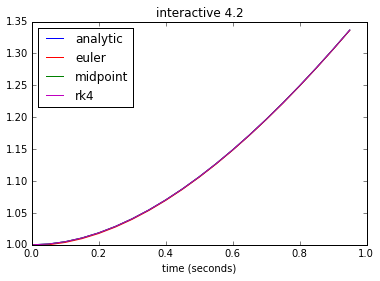

In [44]:
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,\
                                        rk4ODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)
theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('interactive 4.2')

## Embedded Runge-Kutta Methods: Estimate of the Truncation Error 

<!-- {#lab4:sec:embeddedrk} -->

It is possible to find two methods of different order which share the
same stages $k_i$ and differ only in the way they are combined, i.e. the
coefficients $c_i$. For example, the original so-called embedded
Runge-Kutta scheme was discovered by Fehlberg and consisted of a
fourth-order scheme and fifth-order scheme which shared the same six
stages.

In general, a fourth-order scheme embedded in a fifth-order scheme will
share the stages 

$$
\begin{aligned}
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+b_{21}k_1, t_n+a_2h)\\
    \vdots \\
    k_6 = h f(y_n+b_{51}k_1+ ...+b_{56}k_6, t_n+a_6h)
  \end{array}
   \end{aligned}
$$

 <!-- \label{lab4:eq:stages} -->

<!-- \label{lab4:eq:fifth} -->


The fifth-order formula takes the step: 

$$
  y_{n+1}=y_n+c_1k_1+c_2k_2+c_3k_3+c_4k_4+c_5k_5+c_6k_6
$$ 

while the
embedded fourth-order formula takes a different step:

<!-- \label{lab4:eq:fourth} -->

$$
 y_{n+1}^*=y_n+c^*_1k_1+c^*_2k_2+c^*_3k_3+c^*_4k_4+c^*_5k_5+c^*_6k_6
$$

If we now take the difference between the two numerical estimates, we
get an estimate $\Delta_{\rm spec}$ of the truncation error for the
fourth-order method, 

<!-- \label{lab4:eq:errorest} -->
$$
 \Delta_{\rm est}(i)=y_{n+1}(i) - y_{n+1}^{*}(i) 
= \sum^{6}_{i=1}(c_i-c_{i}^{*})k_i
$$ 

This will prove to be very useful
in the next lab where we provide the Runge-Kutta algorithms with
adaptive stepsize control. The error estimate is used as a guide to an
appropriate choice of stepsize.

An example of an embedded Runge-Kutta scheme was found by Cash and Karp
and has the tableau: 

$$
\begin{array}{|c|c|cccccc|c|c|} \hline
i & a_i & {b_{ij}} & & & & &  & c_i & c^*_i \\ \hline
1 &  &  &  &  & &  &  & \frac{37}{378} & \frac{2825}{27648}\\
2 & \frac{1}{5} & \frac{1}{5}&  &  & &  & & 0 &0 \\
3 & \frac{3}{10} & \frac{3}{40}&\frac{9}{40}&  & & &  &\frac{250}{621}&\frac{18575}{48384}\\
4 &  \frac{3}{5}&\frac{3}{10}& -\frac{9}{10}&\frac{6}{5}& & &  &\frac{125}{594}& \frac{13525}{55296}\\
5 & 1 & -\frac{11}{54}&\frac{5}{2}&-\frac{70}{27}&\frac{35}{27}&  &  & 0 & \frac{277}{14336}\\
6 &  \frac{7}{8}&  \frac{1631}{55296}&  \frac{175}{512}&\frac{575}{13824}& \frac{44275}{110592}& \frac{253}{4096}&  & \frac{512}{1771} & \frac{1}{4}\\\hline
{j=} & & 1 & 2 & 3 & 4 & 5 & 6 & & \\ \hline
\end{array}
$$

<a name="problem_embedded"></a>
**Problem embedded**: Though the error estimate is for the embedded
fourth-order Runge-Kutta method, the fifth-order method can be used in
practice for calculating the solution, the assumption being the
fifth-order method should be at least as accurate as the fourth-order
method. In the demo below, compare solutions of the test problem
(eq: test2]) 

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \ \mathbf{eq: test2}$$

generated by the fifth-order method with solutions generated by the
standard fourth-order Runge-Kutta method. Which method
is more accurate? Again, determine how the error decreases as you halve
the stepsizes. 

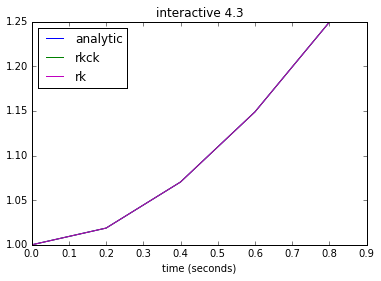

In [45]:
import numpy as np
from matplotlib import pyplot as plt

from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.2,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
l3=theAx.plot(timeVec,yrk,'m-',label='rk')
theAx.legend(loc='best')
theAx.set_title('interactive 4.3')

# moving from a notebook to a library

If we want our ODE routines to be more generally useful, we need to lift
two restrictions from the code:

1.  Inital conditions are currently specified in the main script as a dictionary, e.g.:
  
    ```python
    
       initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,
                    'dt':0.2,'c1':-1.,'c2':1.,'c3':1.}                
            
    ```               
    and then converted to a named tuple in [initinter41](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/lab4_functions.py#L5-L9)
   
    We need to move this into an external configuration file that we can keep track of using
    version control, so we can keep the library code  and the input
    and output files in separate folders and keep a record of our runs.
    
2.  The derivatives are hardwired into the library, for example in
    [eulerinter41](https://github.com/phaustin/numeric/blob/3bab591fb584abbc95757eb40ae5c83dce3cb94a/numlabs/lab4/lab4_functions.py#L15-L17), 
    .  We need to be able to have integrators work with any derivative function.
    
## Writing a config file

Python has a variety of configuration libraries, including [configparser](https://docs.python.org/3.4/library/configparser.html) in the standard library.  This is
overkill, however, for our simple programs.  We just need a way to input and output a
dictionary in human readable form.  One example of how to do this is
[write_init.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/example/write_init.py):

```python

    """
       write the initial condition file for the simple oscillator
       example
    """

    import json

    initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
    initialVals['comment'] = 'written Sep. 29, 2015'
    initialVals['plot_title'] = 'simple damped oscillator run 1'

    with open('run_1.json','w') as f:
          f.write(json.dumps(initialVals,indent=4))
```

When you run this from the command line or IPython with:


    In [19]: run write_init
    
you get a json [Javascript Object Notation](https://en.wikipedia.org/wiki/JSON)
file that looks like this:

```javascript

    {
        "t_beg": 0.0,
        "c1": 0.0,
        "c2": 1.0,
        "t_end": 40.0,
        "dt": 0.1,
        "plot_title": "simple damped oscillator run 1",
        "comment": "written Sep. 29, 2015",
        "yinitial": [
            0.0,
            1.0
        ]
    }
```
This format is simple enough to change with a text editor.

To load this into a program, do something like [read_init.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/example/read_init.py):

```python

    import json
    from collections import namedtuple

    with open('run_1.json','r') as f:
          init_dict=json.load(f)

    print('as a dictionary:\n{}\n'.format(init_dict))

    #either use this as a dict or convert to a namedtuple
    initvals=namedtuple('initvals','dt c1 c2 t_beg t_end yinitial comment plot_title')
    theCoeff=initvals(**init_dict)

    print('as a namedtuple:\n{}'.format(theCoeff))

```

which produces:

```
In [21]: run read_init
as a dictionary:
{'yinitial': [0.0, 1.0], 'c2': 1.0, 'plot_title': 'simple damped oscillator run 1', 'comment': 'written Sep. 29, 2015', 't_end': 40.0, 'c1': 0.0, 't_beg': 0.0, 'dt': 0.1}

as a namedtuple:
initvals(dt=0.1, c1=0.0, c2=1.0, t_beg=0.0, t_end=40.0, yinitial=[0.0, 1.0], comment='written Sep. 29, 2015', plot_title='simple damped oscillator run 1')
```




## Passing a derivative function to an integrator

In python, functions are first class objects, which means you can pass them around like any
other datatype, no need to get function handles as in matlab or Fortran.  The integrators
in [test.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/example/test.py)
have been written to accept a derivative function of the form:

```python
    def derivs4(coeff, y):
```

i.e. as long as the derivative can be written in terms of coefficients
and the previous value of y, the integrator will move the ode ahead one
timestep.  If we wanted coefficients that were a function of time, we would
need to also include those functions the coeff namedtuple, and add keep track of the
timestep through the integration.

Here's an example using foward euler to integrate the harmonic oscillator

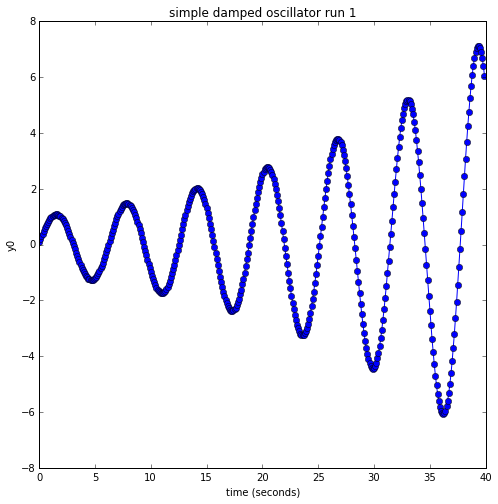

In [46]:
%matplotlib inline

import json
from numlabs.lab4.example.test import read_init,euler4
#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=euler4(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       



<a name="prob_a"></a>

**problem coding A**: Try out [the lab4 example](https://github.com/phaustin/numeric/tree/master/numlabs/lab4/example):

As set up above, test.py
solved the damped, harmonic oscillator with the (unstable) forward Euler method.

1.  Write a new routine that solves the harmonic oscilator using [Heun’s method](#eq_heuns)
    along the lines of the routines in [lab4_functions.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/lab4_functions.py)

    Hand in a notebook with the code and a plot.

<a name="prob_b"></a>    
**problem coding B**:

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. $$f(y,t) = t - y  + 1.0$$ Choose two sets
    of initial conditions and investigate the behaviour.

2.  Is there any difference between the two methods when applied to
    either problem? Should there be? Explain by analyzing the steps
    that each method is taking.

<a name="prob_c"></a>    
**problem coding C**:

6.  Solve the Newtonian cooling equation of lab 1 by any of the above
    methods. 

7.  Hand in some sample plots along with the parameter values and
    initial conditions used.

# Mathematical Notes 

<!-- {#lab4:ap:mathnote} -->


<!--  {#lab4:ap:midpointderiv} -->

## Note on the Derivation of the Second-Order Runge-Kutta Methods

A general s-stage Runge-Kutta method can be written as,

$$
\begin{aligned}
  \begin{array}{l}
    k_i = h f(y_n+ {\displaystyle \sum_{j=1}^{s} } b_{ij}k_j, t_n+a_ih), 
                                                          \;\;\; i=1,..., s\\
    y_{n+1} = y_n + {\displaystyle \sum_{j=1}^{s}} c_jk_j 
  \end{array}\end{aligned}$$ 
  
  where

${\displaystyle \sum_{j=1}^{s} } b_{ij} = a_i$.

In particular, an *explicit* 2-stage Runge-Kutta method can
be written as, 

$$
\begin{aligned}
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+ak_1, t_n+ah)\\
    y_{n+1} = y_n + c_1k_1 +c_2k_2
  \end{array}
  \end{aligned}
  $$
  where 
 
 $  b_{21} = a_2 \equiv a$. 
  
  So we want
to know what values of $a$, $c_1$ and $c_2$ leads to a second-order
method, i.e. a method with an error proportional to $h^3$.

To find out, we compare the method against a second-order Taylor expansion,

<!-- \label{lab4:eq:taylor} -->

$$
  y(t_n+h) = y(t_n) + hy^\prime(t_n) + \frac{h^2}{2}y^{\prime \prime}(t_n)
             + O(h^3)
$$

So for the $y_{n+1}$ to be second-order accurate, it must match the
Taylor method. In other words, $c_1k_1 +c_2k_2$ must
match $hy^\prime(t_n) + \frac{h^2}{2}y^{\prime \prime}$. To do this, we
need to express $k_1$ and $k_2$ in terms of derivatives of $y$ at time
$t_n$.

First note, $k_1 = hf(y_n, t_n) = hy^\prime(t_n)$.

Next, we can expand $k_2$ about $(y_n.t_n)$, 

<!-- \label{lab4:eq:k1} -->

$$
k_2 = hf(y_n+ak_1, t_n+ah) = h(f + haf_t + haf_yy^\prime + O(h^2))
$$

<!-- \label{lab4:eq:secder} -->

However, we can write $y^{\prime \prime}$ as, $$
  y^{\prime \prime} = \frac{df}{dt} = f_t + f_yy^\prime$$ This allows us
to rewrite $k_2$ in terms of $y^{\prime \prime}$,

$$k_2 = h(y^\prime +  hay^{\prime \prime}+ O(h^2))$$

Substituting these expressions for $k_i$ back into the Runge-Kutta
formula gives us,
$$y_{n+1} = y_n + c_1hy^\prime +c_2h(y^\prime +  hay^{\prime \prime})$$
or $$y_{n+1} = y_n + h(c_1 +c_2)y^\prime +  h^2(c_2a)y^{\prime \prime}$$

If we compare this against the second-order Taylor method,
we see that we need, 

$$
\begin{aligned}
   \begin{array}{l}
  c_1 + c_2 = 1\\
  a c_2 = \frac{1}{2}
   \end{array}
   \end{aligned}
   $$ 
   
for the Runge-Kutta method to be
second-order.

<a name="app_midpoint"></a>
If we choose $a = 1/2$, this implies $c_2 = 1$ and $c_1=0$. This gives
us the midpoint method.

However, note that other choices are possible. In fact, we have a
*one-parameter family* of second-order methods. For example
if we choose, $a=1$ and $c_1=c_2=\frac{1}{2}$, we get the
*modified Euler method*,

<!-- \label{lab4:eq:modifiedeuler} -->

$$
\begin{aligned}
    \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+k_1, t_n+h)\\
    y_{n+1} = y_n + \frac{1}{2}(k_1 +k_2)
  \end{array}
    \end{aligned}$$ 
    
    while the choice
$a=\frac{2}{3}$, $c_1=\frac{1}{4}$ and $c_2=\frac{3}{4}$, gives us
*Heun’s method*,

<!-- \label{lab4:eq:heuns} -->

<a name="eq_heuns"></a>
$$
\begin{aligned}
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
   \end{aligned}
$$

# Glossary 


- **driver**  A routine that calls the other routines to solve the
  problem.

- **embedded Runge-Kutta methods**:  Two Runge-Kutta
  methods that share the same stages. The difference between the solutions
  give an estimate of the local truncation error.

- **explicit**  In an explicit numerical scheme, the calculation of the solution at a given
  step or stage does not depend on the value of the solution at that step
  or on a later step or stage.
              
- **fourth-order Runge-Kutta method**  A popular fourth-order, four-stage, explicit Runge-Kutta
  method.

- **implicit**: In an implicit numerical scheme, the
  calculation of the solution at a given step or stage does depend on the
  value of the solution at that step or on a later step or stage. Such
  methods are usually more expensive than implicit schemes but are better
  for handling stiff ODEs.

- **midpoint method** :  A two-stage,
  second-order Runge-Kutta method.

- **stages**:  The approximations
  to the derivative made in a Runge-Kutta method between the start and end
  of a step.

- **tableau**  The tableau for a Runge-Kutta method
  organizes the coefficients for the method in tabular form.

